# MNIST

In [15]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


## RNN
### EDA

In [16]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [17]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

unique, counts = np.unique(y_train, return_counts=True)
print(f"Train labels: {dict(zip(unique, counts))}")

unique, counts = np.unique(y_test, return_counts=True)
print(f"Test labels: {dict(zip(unique, counts))}")

Train labels: {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels: {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


In [18]:
indexes = np.random.randint(0, x_train.shape[0], size=9)
"""
images = x_train[indexes]
labels = y_train[indexes]
"""

'\nimages = x_train[indexes]\nlabels = y_train[indexes]\n'

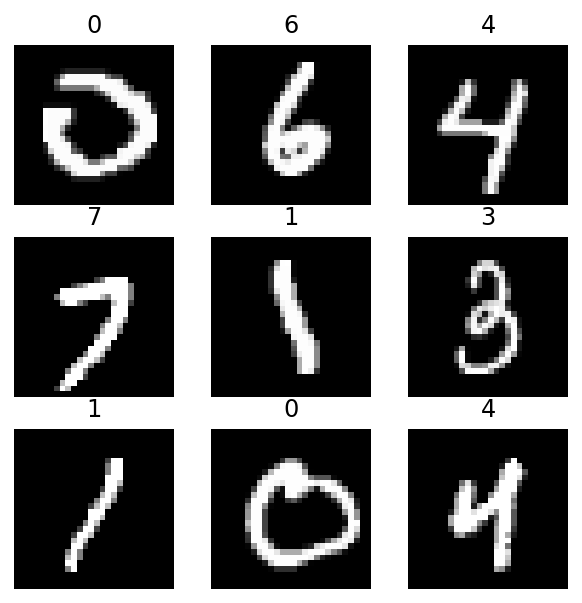

In [19]:
plt.figure(figsize=(5,5))
for idx, i in enumerate(indexes):
    plt.subplot(3,3,idx+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(y_train[i])
plt.show()

### Preprocessing

In [20]:
from keras.layers import Dense, Activation, SimpleRNN

In [21]:
num_labels = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size])
x_test = np.reshape(x_test, [-1, image_size, image_size])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

input_shape = (image_size, image_size) #실제로 (timesteps, input_dim)
batch_size = 128
units = 256 #출력 유닛의 개수
dropout = 0.2
### RNN의 출력은 현재 입력 + 이전 출력 혹은 은닉 상태로 구성

In [22]:
def create_func_model():
    inputs = keras.Input(shape=input_shape)
    rnn1 = SimpleRNN(units=units,
                     dropout=dropout
                    )(inputs)
    outputs = Dense(num_labels,
                   activation='softmax'
                  )(rnn1)
    model = keras.models.Model(inputs, outputs)
    return model

In [23]:
func_model = create_func_model()
func_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 256)               72960     
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 75,530
Trainable params: 75,530
Non-trainable params: 0
_________________________________________________________________


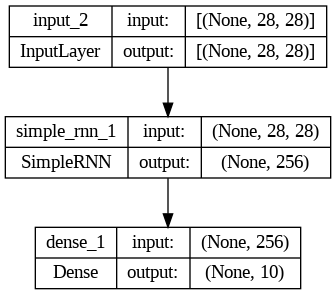

In [24]:
keras.utils.plot_model(model=func_model,
                       to_file='rnn-mnist.png',
                       show_shapes=True
                      )

In [25]:
learning_rate = 0.001
func_model.compile(loss='categorical_crossentropy',
                   optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
                   metrics=['accuracy']
                  )

In [26]:
history = func_model.fit(x_train, y_train,
                         epochs=20,
                         batch_size=batch_size,
                         validation_data=(x_test, y_test)
                        )

Epoch 1/20
469/469 [==============================] - 12s 25ms/step - loss: 1.8517 - accuracy: 0.4261 - val_loss: 1.2964 - val_accuracy: 0.6524
Epoch 2/20
469/469 [==============================] - 12s 25ms/step - loss: 1.1086 - accuracy: 0.7004 - val_loss: 0.8637 - val_accuracy: 0.7782
Epoch 3/20
469/469 [==============================] - 23s 50ms/step - loss: 0.8249 - accuracy: 0.7761 - val_loss: 0.6717 - val_accuracy: 0.8301
Epoch 4/20
469/469 [==============================] - 20s 44ms/step - loss: 0.6701 - accuracy: 0.8192 - val_loss: 0.5489 - val_accuracy: 0.8614
Epoch 5/20
469/469 [==============================] - 18s 39ms/step - loss: 0.5623 - accuracy: 0.8507 - val_loss: 0.4600 - val_accuracy: 0.8834
Epoch 6/20
469/469 [==============================] - 17s 36ms/step - loss: 0.4883 - accuracy: 0.8679 - val_loss: 0.4002 - val_accuracy: 0.8969
Epoch 7/20
469/469 [==============================] - 20s 42ms/step - loss: 0.4333 - accuracy: 0.8824 - val_loss: 0.3537 - val_accuracy:

In [27]:
loss, acc = func_model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"Test accuracy: {(100*acc):>.1f}%")

79/79 [==============================] - 0s 5ms/step - loss: 0.1780 - accuracy: 0.9487
Test accuracy: 94.9%


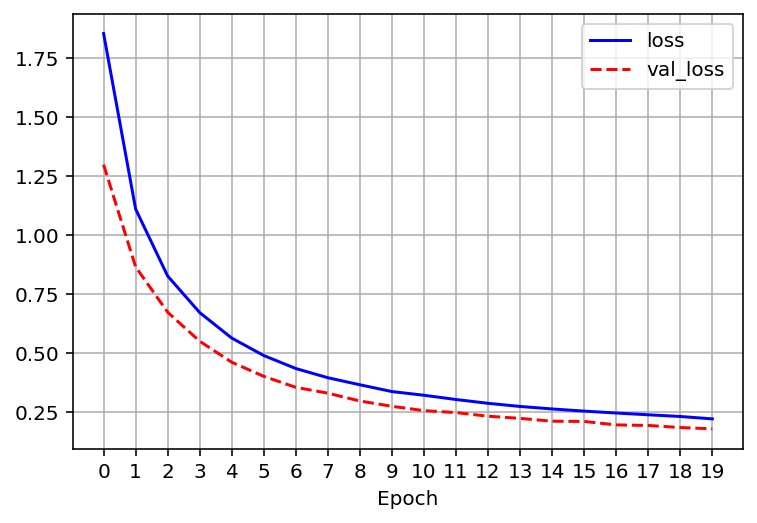

In [32]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

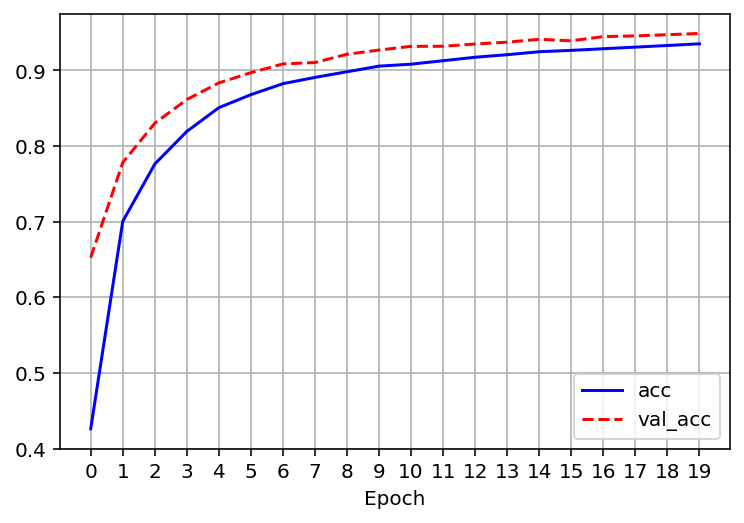

In [33]:
plt.plot(history.history['accuracy'], 'b-', label='acc')
plt.plot(history.history['val_accuracy'], 'r--', label='val_acc')
plt.xlabel('Epoch')
plt.xticks(range(20))
plt.grid()
plt.legend()
plt.show()

In [ ]:
func_model.save_weights('./save/func_model.skpt')

In [34]:
func_model.save('./save/func_model')

In [35]:
func_model_2 = keras.models.load_model('./save/func_model')

In [36]:
func_model_2.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1780 - accuracy: 0.9487


[0.17801429331302643, 0.9487000107765198]